In [2]:
from selenium import webdriver

from selenium.webdriver.common.by import By

from selenium.webdriver.common.keys import Keys

from selenium.webdriver.chrome.options import Options

from selenium.common.exceptions import NoSuchElementException

from time import sleep

import pandas as pd

from bs4 import BeautifulSoup

import re

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
driver = webdriver.Chrome()

driver.get("https://in.indeed.com/")

driver.maximize_window() 

input_bar = driver.find_element(By.XPATH, '//input[@placeholder="Job title, keywords, or company"]') 
sleep(1)

search = driver.find_element(By.XPATH, '//button[@type="submit"]')

input_bar.send_keys("Python Developer")
sleep(1)

search.click()

In [4]:
job_title = []

company_name = []

job_location = []

package = []

apply_link = []

for i in range(200):
    try:
        pop = driver.find_element(By.XPATH, '//div[@role="dialog"]')
        close_pop = driver.find_element(By.XPATH, '//button[@class="css-yi9ndv e8ju0x51"]')
        
        if pop.is_displayed():
            close_pop.click()
            print("Closed the pop-up")
            
    except:
        pass
    
    print("scraping page", i+1) # it will print scraping page 1 to confirm whether it is scraping or not
    
    # scraping job title
    job = driver.find_elements(By.XPATH, '//a[@class="jcs-JobTitle css-jspxzf eu4oa1w0"]')
    job_title.extend(j.text if j.text else "None" for j in job)
    
    # scraping company name
    company = driver.find_elements(By.XPATH, '//span[@class="css-1x7z1ps eu4oa1w0"]')
    company_name.extend(c.text if c.text else "None" for c in company)
    
    # scraping the job link
    job_link = driver.find_elements(By.XPATH, '//a[@class="jcs-JobTitle css-jspxzf eu4oa1w0"]')
    apply_link.extend([link.get_attribute("href") for link in job_link])
    
    # scraping the location 
    locs = driver.find_elements(By.XPATH, '//div[@class="css-ozny1x eu4oa1w0"]')
    for i in locs:
        text = i.text
        job_location.append(text)
    lo = driver.find_elements(By.XPATH, '//div[@class="css-t4u72d eu4oa1w0"]')
    for i in lo:
        text = i.text
        job_location.append(text)
        
    # using beautiful soup to extract salalry details    
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'html.parser')
    
    salary_elements = soup.find_all('div', class_='metadata salary-snippet-container')
    for salary_element in salary_elements:
        salary_text = salary_element.get_text()
        package.append(salary_text)
        
    if len(salary_elements) < len(job):
        missing_salaries = len(job) - len(salary_elements)
        
        for _ in range(missing_salaries):
            package.append("None")
            
    # It will break the if there are no pages left.        
    try:
        next_page = driver.find_element(By.XPATH, '//a[@data-testid="pagination-page-next"]')
        next_page.click()
        sleep(3)
        
    except NoSuchElementException:
        print("No more pages found. Exiting the loop.")
        break

scraping page 1
Closed the pop-up
scraping page 2
scraping page 3
scraping page 4
scraping page 5
scraping page 6
scraping page 7
scraping page 8
scraping page 9
scraping page 10
scraping page 11
scraping page 12
scraping page 13
scraping page 14
scraping page 15
scraping page 16
scraping page 17
scraping page 18
scraping page 19
scraping page 20
scraping page 21
scraping page 22
scraping page 23
scraping page 24
scraping page 25
scraping page 26
scraping page 27
scraping page 28
scraping page 29
scraping page 30
scraping page 31
scraping page 32
scraping page 33
scraping page 34
scraping page 35
scraping page 36
scraping page 37
scraping page 38
scraping page 39
scraping page 40
scraping page 41
scraping page 42
scraping page 43
scraping page 44
scraping page 45
scraping page 46
scraping page 47
scraping page 48
scraping page 49
scraping page 50
scraping page 51
scraping page 52
scraping page 53
scraping page 54
scraping page 55
scraping page 56
scraping page 57
scraping page 58
scrap

In [5]:
driver.quit()

In [6]:
data = {
        "Title" : job_title,
        "Company Name" : company_name,
        "Location" : job_location,
        "Package" : package,
        "Apply Link" : apply_link
}

In [7]:
data = pd.DataFrame(data)

In [8]:
data = data.to_csv("C:\\Users\\ADMIN\\Desktop\\Assignment\\Indeed_jobs1.csv")

In [9]:
df = pd.read_csv("C:\\Users\\ADMIN\\Desktop\\Assignment\\Indeed_jobs.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Title,Company Name,Location,Package,Apply Link,district,state,Numeric Package,Min Range,Max Range,Avg Salary
0,0,0,Python developer,dv-indan,"Chennai, Tamil Nadu","₹60,000 a month",https://in.indeed.com/rc/clk?jk=7277263a73b982...,Chennai,Tamil Nadu,NaN,NaN,NaN,NaN
1,1,1,Junior Python Developer,NetArt,"Bengaluru, Karnataka","Up to ₹10,00,000 a year",https://in.indeed.com/company/NetArt/jobs/Juni...,Bengaluru,Karnataka,NaN,NaN,NaN,NaN
2,2,2,Python Developer,edutinker,Remote,"₹10,00,000 - ₹40,00,000 a year",https://in.indeed.com/company/eduTinker/jobs/P...,All India,All India,1000000 - 4000000,1000000.0,4000000.0,2500000.0
3,3,3,Python Developer,Virtusa,Hybrid remote in Andhra Pradesh,"₹60,000 - ₹70,000 a month",https://in.indeed.com/rc/clk?jk=81a74f63e87b1d...,Andhra Pradesh,All India,60000 - 70000,60000.0,70000.0,65000.0
4,4,4,Python Developer,Client of Wish-WAS,"Remote in Bengaluru, Karnataka","₹22,000 a month",https://in.indeed.com/company/Wish-Workforce-A...,Bengaluru,Karnataka,NaN,NaN,NaN,NaN


In [10]:
del df['Unnamed: 0']

In [11]:
df[['district', 'state']] = df['Location'].str.split(', ', 1, expand=True)
df['district'] = df['district'].str.replace("Remote","").str.replace("in", "").str.replace("Hybrid remote","").str.strip()
df['state'] = df['state'].str.replace("Chennai", "Tamil Nadu").str.replace("None","India").str.replace("Vadodara","Gujarat")

In [12]:
def extract_numeric(package_str):
    if isinstance(package_str, str):
        salary_values = re.findall(r'[₹\d,]+', package_str)
        numeric_values = [int(re.sub(r'[₹,]', '', value)) for value in salary_values]

        if len(numeric_values) == 2:
            return ' - '.join(map(str, numeric_values))
    
    return None
df['Numeric Package'] = df['Package'].apply(extract_numeric)

In [13]:
df[['Numeric Package', 'Min Range', 'Max Range']] = df[['Numeric Package', 'Min Range', 'Max Range']].applymap(lambda x: np.nan if x is None else x)

In [14]:
cols = ['Min Range', 'Max Range', 'Avg Salary']
for col in cols:
    df[col] = df[col].fillna(0).astype('int64')

In [15]:
values = []
for i in df['Min Range']:
    values.append(i)
results = []

for i in values:
    if len(str(i)) <= 4:
        result = i * 2800
    elif len(str(i)) == 5:
        result = i * 12
    else:
        result = i
    results.append(result)
df['Min Range'] = results

In [16]:
values = []
for i in df['Max Range']:
    values.append(i)
results = []

for i in values:
    if len(str(i)) <= 4:
        result = i * 2800
    elif len(str(i)) == 5:
        result = i * 12
    else:
        result = i
    results.append(result)
df['Max Range'] = results

In [17]:
df['state'].unique()

array(['Tamil Nadu', 'Karnataka', None, 'Delhi', 'Punjab',
       'Uttar Pradesh', 'Maharashtra', 'Andhra Pradesh', 'Gujarat',
       'Kerala', 'Haryana', 'Madhya Pradesh', 'Tamil Nadu, Tamil Nadu',
       'Telangana', 'Gujarat, Gujarat', 'Assam', 'Rajasthan',
       'Pune, Maharashtra', 'Hyderabad, Telangana', 'West Bengal',
       'Delhi, Delhi', 'Ahmedabad, Gujarat', 'Mumbai, Maharashtra', 'Goa',
       'Jharkhand', 'Uttarakhand', 'Bengaluru, Karnataka', 'Orissa',
       'Ranchi, Jharkhand', 'Chhattisgarh', 'Chandigarh'], dtype=object)

In [19]:
df['Avg Salary'] = df['Min Range'] + df['Max Range'] / 2

df[['district','state']] = df[['district','state']].replace("",'None')

In [20]:
for col in ['district', 'state']:
    df[col] = df[col].str.strip().replace("None", "All India")
    
df['state'] = df['state'].fillna('All India')

In [21]:
replacements = {
    "Bengaluru, Karnataka": "Karnataka",
    "Hyderabad, Telangana": "Telangana",
    "Pune, Maharashtra": "Maharashtra",
    "Ahmedabad, Gujarat": "Gujarat",
    "Ranchi, Jharkhand" : "Jharkhand",
    "Gujarat, Gujarat": "Gujarat",
    "Mumbai, Maharashtra" : "Maharashtra",
    "Chandigarh": "Punjab/Haryana"
}

df['state'] = df['state'].replace(replacements)

In [22]:
replacements = { 
                "Gudy" : "Guindy",
                "Indiranagar":"Bengaluru",
                "Rajarajeshwari Nagar":"Bengaluru",
                "Kulasegaram":" Kanyakumari",
                "Nagar":"Ranchi",
                "Chchwad":"Pune",
                "Kothrud":"Pune",
                "Navrangpura":"Ahmedabad",
                "Hebbal":"Bengaluru",
                'Andhra Pradesh': "Hybrid Remote",
                "India":"Remote",
                "Adambakkam":"Chennai",
                "Alkapuri":"Vadodara",
                "Kharadi":"Pune",
                "Gandhagar":"Gandhinagar",
                "Madhapur":"Hyderabad",
                "Kerala":"Remote",
                "Tamil Nadu":"Hybrid Remote",
                "Narhe":"Pune",
                "Karnataka":"Hybrid Remote",
                "Telangana":"Hybnid Remote",
                "Gujarat":"Hybrid Remote",
                "Malkajgiri":"Hyderabad",             
    
         
}

In [23]:
df['district'] = df['district'].replace(replacements)

In [24]:
df1 = df.copy()

In [25]:
df1.drop(df1[df1['Location'] == 'Remote'].index, inplace=True)

df1.head()

,Unnamed: 0.1,Title,Company Name,Location,Package,Apply Link,district,state,Numeric Package,Min Range,Max Range,Avg Salary
0,0,Python developer,dv-indan,"Chennai, Tamil Nadu","₹60,000 a month",https://in.indeed.com/rc/clk?jk=7277263a73b982...,Chennai,Tamil Nadu,None,0,0,0.0
1,1,Junior Python Developer,NetArt,"Bengaluru, Karnataka","Up to ₹10,00,000 a year",https://in.indeed.com/company/NetArt/jobs/Juni...,Bengaluru,Karnataka,None,0,0,0.0
3,3,Python Developer,Virtusa,Hybrid remote in Andhra Pradesh,"₹60,000 - ₹70,000 a month",https://in.indeed.com/rc/clk?jk=81a74f63e87b1d...,Hybrid Remote,All India,60000 - 70000,720000,840000,1140000.0
4,4,Python Developer,Client of Wish-WAS,"Remote in Bengaluru, Karnataka","₹22,000 a month",https://in.indeed.com/company/Wish-Workforce-A...,Bengaluru,Karnataka,None,0,0,0.0
6,6,Python Developer,Klaus IT Solutions,"Bengaluru, Karnataka","₹600 - ₹1,200 an hour",https://in.indeed.com/rc/clk?jk=590bb81d904a74...,Bengaluru,Karnataka,600 - 1200,1680000,3360000,3360000.0


In [26]:
replacement_values = "Andhra Pradesh"
indices = np.where(df1['district'] == "Hybrid Remote")[0][0:4]
df1['state'].iloc[indices] = replacement_values

replacement_values = "Tamil Nadu"
index = np.where(df1['district']== "Hybrid Remote")[0][5]
df1['state'].iloc[index] = replacement_values

replacement_values = "Karnataka"
index = np.where(df1['district']== "Hybrid Remote")[0][6]
df1['state'].iloc[index] = replacement_values

replacement_values = "Gujarat"
index = np.where(df1['district']== "Hybrid Remote")[0][7]
df1['state'].iloc[index] = replacement_values

In [27]:
df1.at[340, 'state'] = "Kerala"
df1.at[529,'state'] = 'Kerala'
df1.at[643,'state'] = 'Kerala'

In [28]:
replacement_values = "Tamil Nadu"
index = index = np.where(df1['state']=='Tamil Nadu, Tamil Nadu')[0]
df1['state'].iloc[index] = replacement_values

In [29]:
df1['district'] = df1['district'].astype('category')
df1['state'] = df1['state'].astype('category')

In [30]:
df1["Title"] = df1['Title'].str.lower()

In [31]:
df1 = df1[df1['Avg Salary'] != 0]
df1 = df1[df1['state']!='All India']
df1 = df1[df1['Avg Salary']!=0.0]
python_developer =  df1[df1['Title']=='python developer']

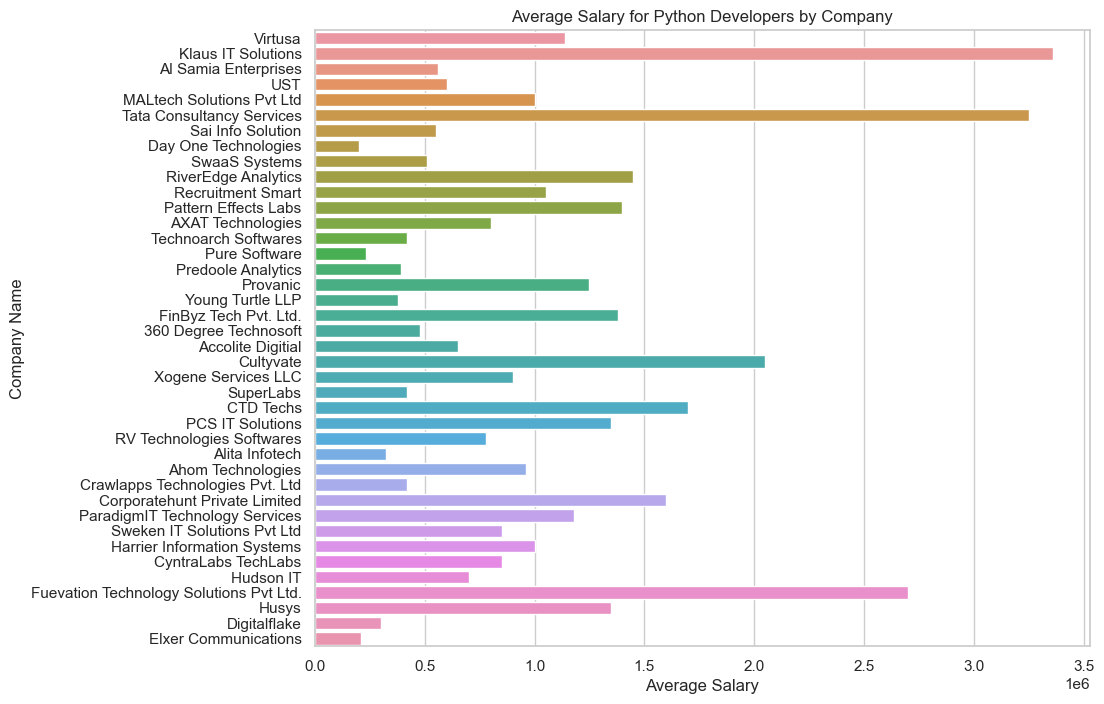

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.barplot(data=python_developer, x='Avg Salary', y='Company Name')
plt.xlabel("Average Salary")
plt.ylabel("Company Name")
plt.title("Average Salary for Python Developers by Company")
plt.show()

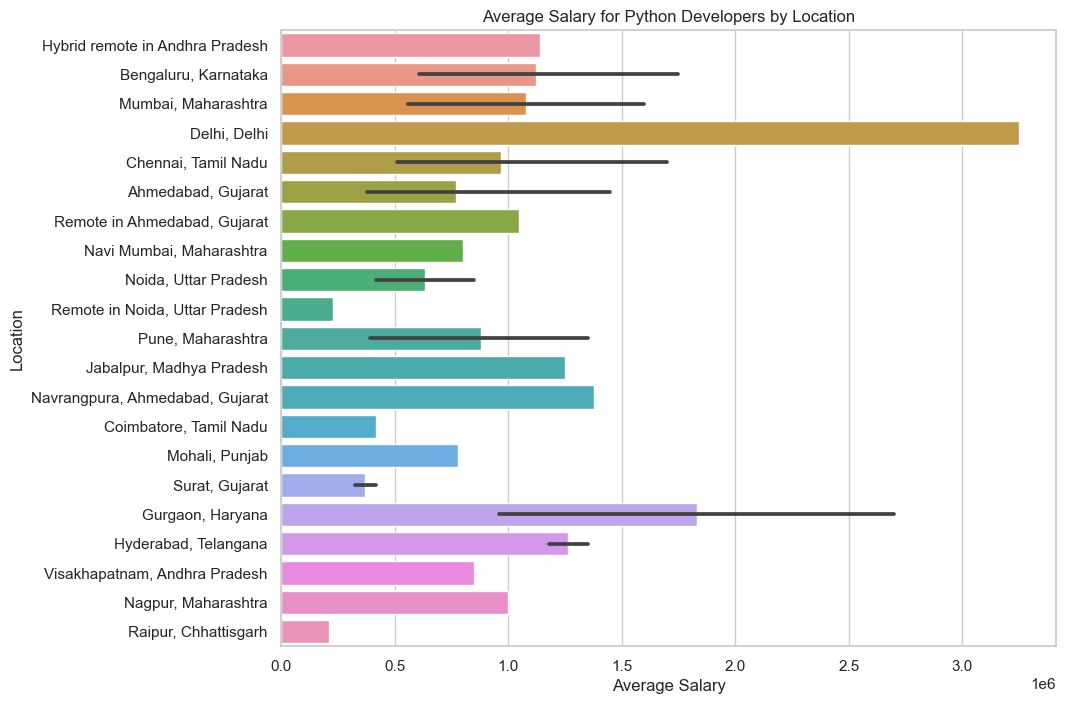

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.barplot(data=python_developer, x='Avg Salary', y='Location')
plt.xlabel("Average Salary")
plt.ylabel("Location")
plt.title("Average Salary for Python Developers by Location")
plt.show()

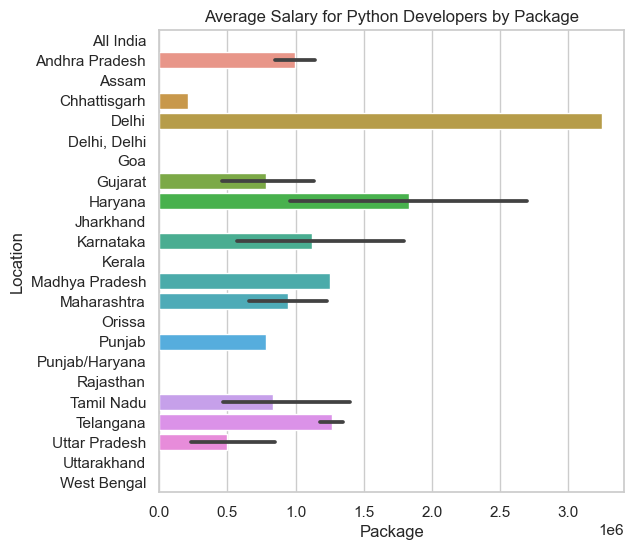

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
sns.barplot(data=python_developer, x='Avg Salary', y='state')
plt.xlabel("Package")
plt.ylabel("Location")
plt.title("Average Salary for Python Developers by Package")
plt.show()

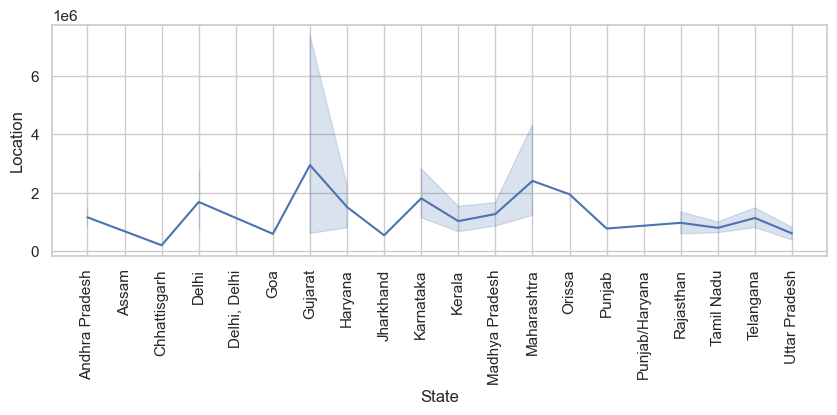

In [35]:
plt.figure(figsize=(10,3))
sns.lineplot(data=df1, x='state',y='Avg Salary')
plt.xticks(rotation = 90)
plt.xlabel("State")
plt.ylabel("Location")
plt.show()